In [191]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

## Homework

> Note: sometimes your answer doesn't match one of
> the options exactly. That's fine.
> Select the option that's closest to your solution.

### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns


In [193]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
data.head()


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369



The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Preparing the dataset

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [194]:
data = data[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
data.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')


### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?


### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`


In [195]:
data.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [196]:
data['horsepower'].median()

149.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.

In [197]:
# create the index and shuffle it

idx = np.arange(len(data))
np.random.seed(42)
np.random.shuffle(idx)
#


* Split your data in train/val/test sets, with 60%/20%/20% distribution.


In [198]:
n = len(data)
n_val = int(n * .2)
n_test = int(n * .2)
n_train = n - n_val - n_test

print(f'train size: {n_train}, val and test: {n_val}, {n_test}, total: {n}, sum check: {n_train + n_val + n_test}')
print(f'index check: 0:{n_train}, {n_train}:{n_train+n_val}, {n_train+n_val}:end')


train size: 5824, val and test: 1940, 1940, total: 9704, sum check: 9704
index check: 0:5824, 5824:7764, 7764:end


In [199]:
df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train:n_train+n_val]]
df_test = data.iloc[idx[n_train+n_val:]]

df_train.head()
idx[:5]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


array([ 483, 7506, 8795, 1688, 6217])

In [200]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


df_test.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,140,148.0,2704.826005,2017,15.804354
1,210,136.0,3001.227490,2004,14.272374
2,210,152.0,3747.467392,2021,11.748441
3,190,128.0,2705.833636,2014,16.485991
4,230,156.0,2505.939657,2005,17.779704




Use the same code as in the lectures


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.

In [201]:
base=['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

df_zeros_train = df_train[base].fillna(0)
df_mean_train = df_train[base].fillna(df_train.mean())


y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']



* Try both options. For each, train a linear regression model without regularization using the code from the lessons.

In [202]:
def linear_regression(xi, weight):
	return xi.dot(weight)


def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

<Axes: ylabel='Count'>

<Axes: ylabel='Count'>

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

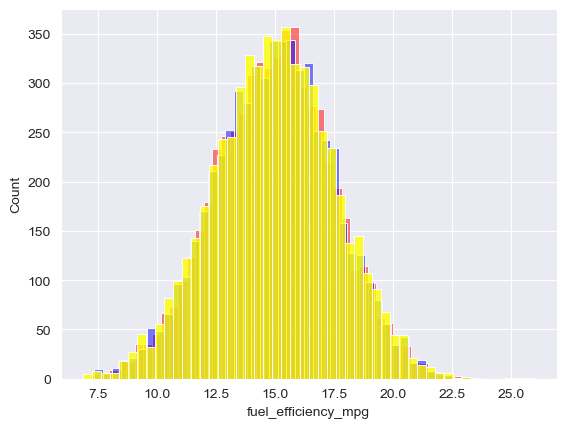

In [203]:
zeros_w0, zeros_w = train_linear_regression(df_zeros_train, y_train)
mean_w0, mean_w = train_linear_regression(df_mean_train, y_train)

y_train_pred_zeros = zeros_w0 + linear_regression(df_zeros_train, zeros_w)
y_train_pred_mean = mean_w0 + linear_regression(df_mean_train, mean_w)

sns.histplot(y_train_pred_zeros, bins=50, color='red', alpha=.5)
sns.histplot(y_train_pred_mean, bins=50, color='blue', alpha=.5)
sns.histplot(y_train, bins=50, color='yellow', alpha=.8)

* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.

In [204]:
def rmse(y, y_pred):
	se = (y - y_pred)**2
	mse = se.mean()
	return np.sqrt(mse)

In [205]:


def prepare_X(df):
	''' this will prepare the dataset and fill na fields with 0

	:param df:
	:return:
	'''
	base_fields =['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
	df_num = df[base_fields].fillna(0)
	X = df_num.values
	return X

# prepare the validation dataset
df_zeros_val = df_val[base].fillna(0)
df_mean_val = df_val[base].fillna(df_val.mean())
y_val = df_val['fuel_efficiency_mpg']

w0_val_zero, w_val_zero = train_linear_regression(df_zeros_val, y_val)
w0_val_mean, w_val_mean = train_linear_regression(df_mean_val, y_val)

y_pred_val_zero = w0_val_zero + linear_regression(df_zeros_val, w_val_zero)

y_pred_val_mean = w0_val_mean + linear_regression(df_mean_val, w_val_mean)

val_zero_rmse = rmse(y_val, y_pred_val_zero)
val_mean_rmse = rmse(y_val, y_pred_val_mean)

print(val_zero_rmse, val_mean_rmse)


0.5167086303896663 0.46310623488998814



* Round the RMSE scores to 2 decimal digits using `round(score, 2)`

In [206]:
print(f'with na as 0: {round(val_zero_rmse,2)}')
print(f'with na as mean: {round(val_mean_rmse,2)}')

with na as 0: 0.52
with na as mean: 0.46



* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.

In [207]:
def train_reg_linear_regression(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + (r * np.eye(XTX.shape[0]))

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [208]:
x_reg_train = prepare_X(df_train)
y_reg_train = df_train['fuel_efficiency_mpg'].values

x_reg_val = prepare_X(df_val)
y_reg_val = df_val['fuel_efficiency_mpg'].values


for reg in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0_reg, w_reg = train_reg_linear_regression(x_reg_train, y_reg_train, r=reg)
    y_reg_pred = w0_reg + linear_regression(x_reg_val, w_reg)
    rmse_result = rmse(y_reg_val, y_reg_pred)
    print(f'reg = {reg}, rmse = {round(rmse_result,2)}')


reg = 0, rmse = 0.52
reg = 0.01, rmse = 0.52
reg = 0.1, rmse = 0.52
reg = 1, rmse = 0.52
reg = 5, rmse = 0.52
reg = 10, rmse = 0.52
reg = 100, rmse = 0.52



* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r`



If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100


### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.

In [209]:
rmse_scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(len(data))
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = data.iloc[idx[:n_train]]
    df_val = data.iloc[idx[n_train:n_train+n_val]]


    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    #df_test_seeds = data.iloc[idx[n_train+n_val:]]

    df_train_x = prepare_X(df_train)
    df_train_y = df_train['fuel_efficiency_mpg']

    df_valid_x = prepare_X(df_val)
    df_valid_y = df_val['fuel_efficiency_mpg']


    w0, w = train_linear_regression(df_train_x, df_train_y)

    y_pred = w0 + linear_regression(df_valid_x, w)
    rmse_result = round(rmse(df_valid_y, y_pred),3)
    rmse_scores.append(rmse_result)
    print(f'seed = {seed}, rmse = {rmse_result}')


print(round(np.array(rmse_scores).std(),3))

seed = 0, rmse = 0.521
seed = 1, rmse = 0.521
seed = 2, rmse = 0.523
seed = 3, rmse = 0.516
seed = 4, rmse = 0.511
seed = 5, rmse = 0.528
seed = 6, rmse = 0.531
seed = 7, rmse = 0.509
seed = 8, rmse = 0.515
seed = 9, rmse = 0.513
0.007


* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different.
> If standard deviation of scores is low, then our model is *stable*.


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`.
* What's the RMSE on the test dataset?

In [210]:
idx = np.arange(len(data))
np.random.seed(9)
np.random.shuffle(idx)

df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train:n_train+n_val]]
df_test = data.iloc[idx[n_train+n_val:]]


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train_val = pd.concat([df_train, df_val], ignore_index=True)
df_train_val_x = prepare_X(df_train_val)
df_train_val_y = df_train_val['fuel_efficiency_mpg']

df_test_x = prepare_X(df_test)
df_test_y = df_test['fuel_efficiency_mpg']


w0, w = train_reg_linear_regression(df_train_val_x, df_train_val_y, 0.001)

y_pred_test = w0 + linear_regression(df_test_x, w)
rmse_result = round(rmse(y_pred_test, df_test_y),3)
print(f'rmse = {rmse_result}')


rmse = 0.516



Options:

- 0.15
- 0.515
- 5.15
- 51.5

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw02
* If your answer doesn't match options exactly, select the closest one